In [62]:
import pandas as pd
import numpy as np
sl = pd.read_csv('service_list.csv')
sl['2014-15 Australian Government Funding'] = sl['2014-15 Australian Government Funding'].replace( '[\$,)n.a]','', regex=True ).replace("",np.nan).astype(float)

res = sl[sl['Residential Places'].notnull()]

In [63]:
%pylab inline
import seaborn
dollars = res.groupby('2015 Aged Care Planning Region (ACPR)')['2014-15 Australian Government Funding'].sum()

bytype = res.groupby(['2015 Aged Care Planning Region (ACPR)','Organisation Type'])['2014-15 Australian Government Funding']\
.sum()

Populating the interactive namespace from numpy and matplotlib


In [64]:
pcts = bytype.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

In [65]:
pcts

2015 Aged Care Planning Region (ACPR)  Organisation Type        
ACT                                    Charitable                    34.456016
                                       Community Based               18.637496
                                       Private Incorporated Body     25.045725
                                       Religious                     21.860763
Alice Springs                          Charitable                    19.058346
                                       Community Based               75.875540
                                       Local Government               5.066114
Barkly                                 Charitable                   100.000000
Barwon-South Western                   Charitable                     5.141187
                                       Community Based               12.755940
                                       Private Incorporated Body     52.414381
                                       Religious                  

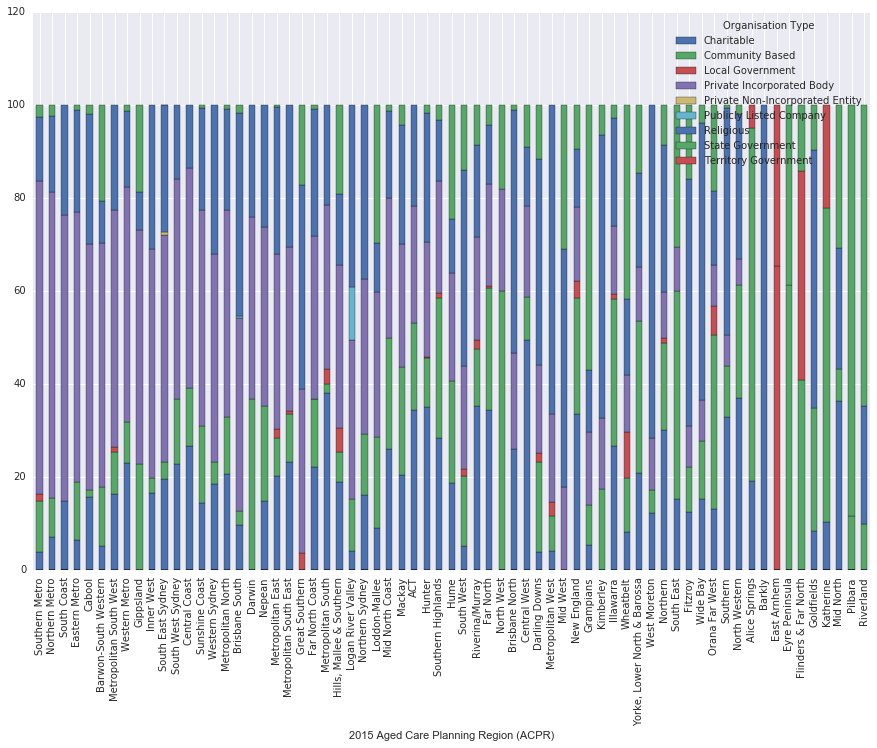

In [66]:
pcts.unstack().sort_values('Private Incorporated Body',ascending=False).plot.bar(stacked=True,figsize=(15,10))

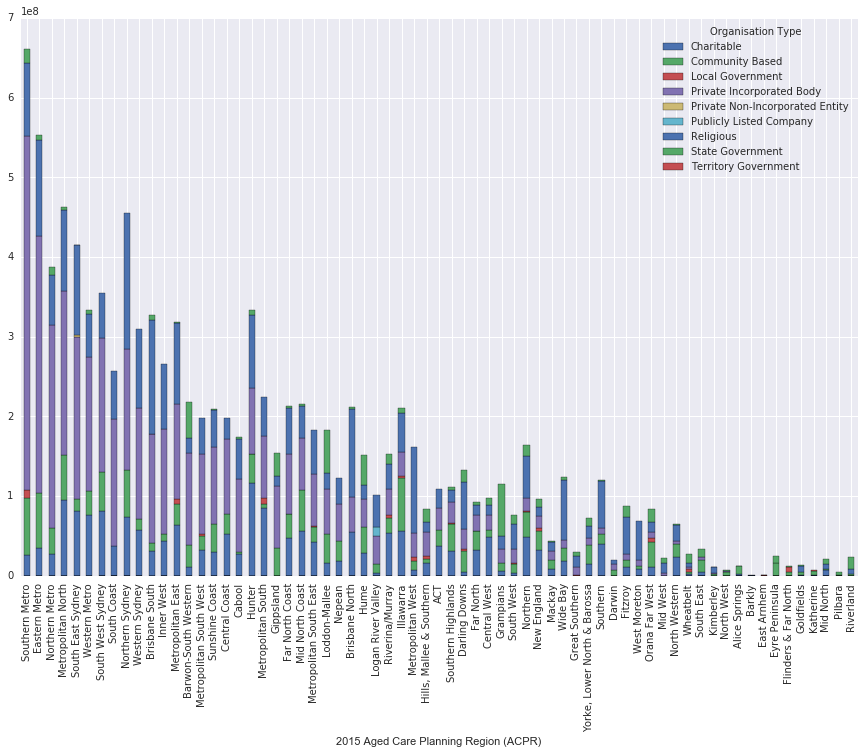

In [68]:
bytype.unstack().sort_values('Private Incorporated Body',ascending=False).plot.bar(stacked=True,figsize=(15,10))

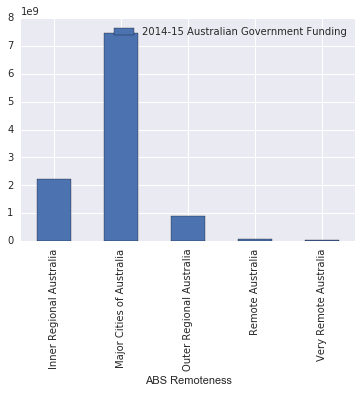

In [71]:
pd.DataFrame(res.groupby('ABS Remoteness')['2014-15 Australian Government Funding'].sum()).plot.bar()